## Preparing optimization

For any model optimization problem with parameters we need:

- An objective function that we want to minimize or maximize
- Domain space for relevant parameters
- A hyperparameter evaluating function 
- Trials (recording scores and parameters for each iteration)

Bayesian optimization makes informed decisions about the next set of parameters to choose based on a constructed
probability model of the surrogate function itself

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [16]:
## Model one polynomial function with a local minimum over a given range
## Objective: minimize the output of this function using optimization methods

def objective(x):
    ''' 
    Make a bizarre polynomial to work with
    '''
    
    f = np.poly1d([15, -22, -280, 31, 112, -26, 10])
    
    return f(x)

Minimum of -29444.2086 occurs at 4.1658


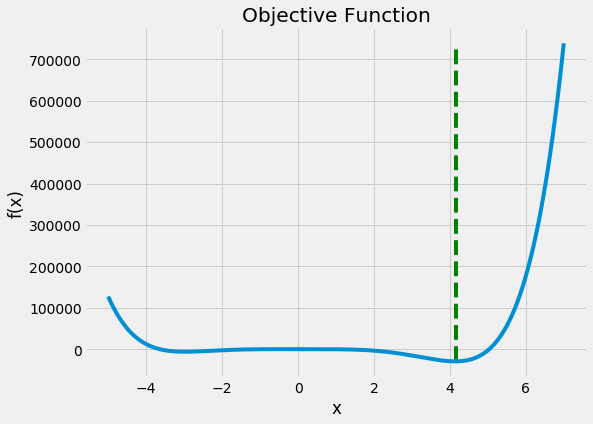

In [17]:
x = np.linspace(-5,7, 200)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'g')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [18]:
## Domain space

from hyperopt import hp

space = hp.uniform('x', -5, 7)


## Setup two methods of optimization

- Random search
- TPE

In [19]:
from hyperopt import rand, tpe

# initialize
tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [20]:
## store outputs in trials

from hyperopt import Trials
tpe_trials = Trials()
rand_trials = Trials()

In [21]:
#RUN OPTIMIZATION

from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=2000, rstate= np.random.RandomState(50))

print(tpe_best)

100%|██████████| 2000/2000 [00:18<00:00, 106.46it/s, best loss: -29463.81433109296]
{'x': 4.135999643939863}


In [22]:
## use a random search approach
rand_best = fmin(fn=objective, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.RandomState(50))

100%|██████████| 2000/2000 [00:05<00:00, 360.38it/s, best loss: -29463.803590541567]


In [23]:
print(rand_best)

{'x': 4.1370068200580015}


In [24]:
## Our best x value was at 4.1658, and we were able to optimize the function with both methods quite close